<a href="https://colab.research.google.com/github/floranuta/Data_Circle/blob/Tetiana/notebooks/Task12_DataCleaningPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive')
# Path of the file to read
#csv_file_path = "D:/REDI/Data_Circle/data/training_set_values.csv"
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/training_set_values.csv"
# Fill in the line below to read the file into a variable home_data
pump_data = pd.read_csv(csv_file_path)
pump_data_labels=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/training_set_labels.csv")
mask_invalid = (
    (pump_data["latitude"].isna()) |
    (pump_data["longitude"].isna()) |
    (pump_data["latitude"] < -12) |
    (pump_data["latitude"] > 0) |
    (pump_data["longitude"] < 29) |
    (pump_data["longitude"] > 41)
)

invalid_rows = pump_data[mask_invalid]
print(f"Number of invalid rows: {len(invalid_rows)}")
pump_data.drop(invalid_rows.index, inplace=True)
print(f"After deletion: {len(pump_data)} rows remain")

cols_to_drop = ["wpt_name","subvillage","waterpoint_type_group", "source_class", "source","quantity_group", "quality_group", "payment_type","management_group", "extraction_type_group", "extraction_type_class","scheme_name", "recorded_by", "public_meeting","num_private", "scheme_name"]
pump_data.drop(columns=cols_to_drop, inplace=True)
pump_data_merged = pd.merge(pump_data, pump_data_labels, on="id", how="left")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of invalid rows: 1812
After deletion: 57588 rows remain


In [7]:
# Overview
def missing_report(df):
    missing_count = df.isnull().sum()
    missing_percent = 100 * df.isnull().mean()
    missing_table = (
        pd.DataFrame({
            "MissingCount": missing_count,
            "MissingPercent": missing_percent
        })
        .query("MissingCount > 0")  # оставить только с пропусками
        .sort_values(by="MissingCount", ascending=False)
    )
    return missing_table

missing_table = missing_report(pump_data_merged)
print(missing_table.to_string())

                   MissingCount  MissingPercent
scheme_management          3751        6.513510
installer                  3636        6.313815
funder                     3624        6.292978
permit                     3056        5.306661
subvillage                  371        0.644231


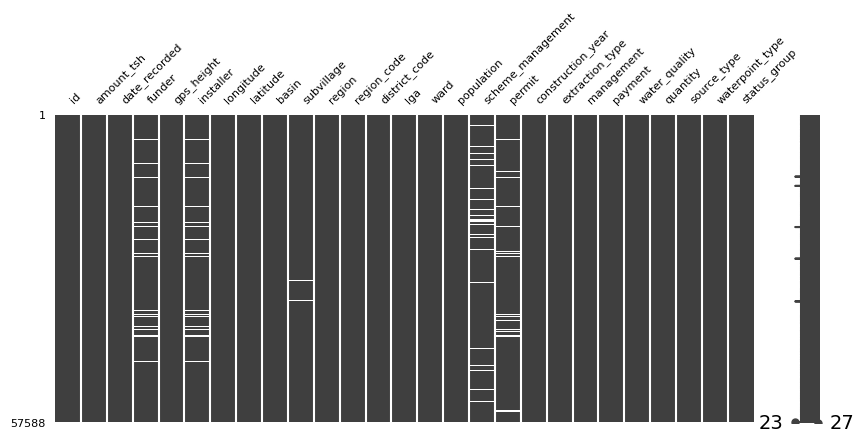

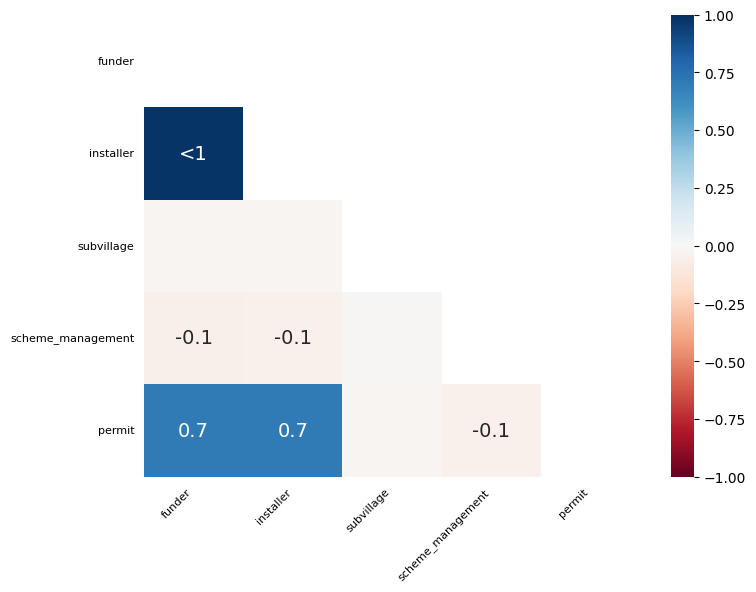

In [8]:
# Visualization
import missingno as msno
msno.matrix(pump_data_merged, figsize=(10,4))
plt.xticks(fontsize=8)   # уменьшаем подписи по X
plt.yticks(fontsize=8)   # уменьшаем подписи по Y
plt.show()
msno.heatmap(pump_data_merged, figsize=(8,6))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [10]:
def print_top10_per_null_column(df, top_n=10):
    # Select columns that contain at least one NaN
    null_cols = df.columns[df.isnull().any()].tolist()
    n_rows = len(df)

    for c in null_cols:
        # Count non-null values for the column
        vc = df[c].value_counts(dropna=True)

        print(f"\n===== {c} =====")  # column header

        if vc.empty:
            # Edge case: column has only NaNs
            print("No non-null values to display.")
            continue

        # Keep only top N
        vc = vc.head(top_n)

        # Percent relative to all rows (not just non-nulls)
        pct = (vc / n_rows * 100).round(2)

        # Build a compact table: value | count | percent
        out = (
            pd.DataFrame({
                "value": vc.index,
                "count": vc.values,
                "percent": pct.values
            })
        )

        # Pretty print without the dataframe index
        print(out.to_string(index=False))

# Usage
print_top10_per_null_column(pump_data_merged, top_n=10)


===== funder =====
                 value  count  percent
Government Of Tanzania   8842    15.35
                Danida   3114     5.41
                Hesawa   1914     3.32
            World Bank   1345     2.34
                  Kkkt   1287     2.23
          World Vision   1224     2.13
                 Rwssp   1187     2.06
                Unicef   1035     1.80
      District Council    843     1.46
                 Tasaf    834     1.45

===== installer =====
             value  count  percent
               DWE  16255    28.23
        Government   1670     2.90
               RWE   1181     2.05
             Commu   1060     1.84
            DANIDA   1050     1.82
              KKKT    897     1.56
            Hesawa    803     1.39
                 0    777     1.35
              TCRS    707     1.23
Central government    619     1.07

===== subvillage =====
   value  count  percent
 Majengo    494     0.86
 Shuleni    492     0.85
Madukani    435     0.76
    Kati    366    

In [11]:
pump_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57588 entries, 0 to 57587
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 57588 non-null  int64  
 1   amount_tsh         57588 non-null  float64
 2   date_recorded      57588 non-null  object 
 3   funder             53964 non-null  object 
 4   gps_height         57588 non-null  int64  
 5   installer          53952 non-null  object 
 6   longitude          57588 non-null  float64
 7   latitude           57588 non-null  float64
 8   basin              57588 non-null  object 
 9   subvillage         57217 non-null  object 
 10  region             57588 non-null  object 
 11  region_code        57588 non-null  int64  
 12  district_code      57588 non-null  int64  
 13  lga                57588 non-null  object 
 14  ward               57588 non-null  object 
 15  population         57588 non-null  int64  
 16  scheme_management  538

In [12]:
pump_data_merged.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,...,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source_type,waterpoint_type,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,...,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,...,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,...,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,...,True,1986,submersible,vwc,never pay,soft,dry,borehole,communal standpipe multiple,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [14]:
# --- explicit lists ---
pump_data_imp = pump_data_merged.copy()
bool_cols = ["permit"]  # True/False only
cat_cols  = ["scheme_management", "installer",
             "funder"]  # other categoricals

# 1) Booleans: fill NaNs with column-wise mode (most frequent)
for c in bool_cols:
    mode_val = pump_data_merged[c].mode(dropna=True).iat[0]
    pump_data_imp[c] = pump_data_imp[c].fillna(mode_val)

# 2) Other categoricals: fill NaNs with "Unknown"
pump_data_imp[cat_cols] = pump_data_imp[cat_cols].fillna("Unknown")

# (Optional) quick check
print(pump_data_imp[bool_cols + cat_cols].isna().sum())

permit               0
scheme_management    0
installer            0
funder               0
dtype: int64


/tmp/ipython-input-96229888.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pump_data_imp[c] = pump_data_imp[c].fillna(mode_val)


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

bool_cols = ["permit"]
cat_cols  = ["scheme_management", "installer", "funder"]

preprocessor = ColumnTransformer(
    transformers=[
        ("bool_mode",   SimpleImputer(strategy="most_frequent"),                   bool_cols),
        ("cat_unknown", SimpleImputer(strategy="constant", fill_value="Unknown"),  cat_cols),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False   # <- keep original column names
).set_output(transform="pandas")

# If sklearn >= 1.2, get a pandas DataFrame back (with column names)
preprocessor.set_output(transform="pandas")

# Fit on train; then use transform on any split for reproducibility
pump_data_imputed = preprocessor.fit_transform(pump_data_merged)

# Quick check
cols_to_check = bool_cols + cat_cols
#print(pump_data_imputed[cols_to_check].isna().sum())


In [16]:
print(cols_to_check)
print(type(pump_data_imputed))
print(pump_data_imputed.columns.tolist())
print(pump_data_imputed[cols_to_check].isna().sum())



['permit', 'scheme_management', 'installer', 'funder']
<class 'pandas.core.frame.DataFrame'>
['permit', 'scheme_management', 'installer', 'funder', 'id', 'amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude', 'basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'construction_year', 'extraction_type', 'management', 'payment', 'water_quality', 'quantity', 'source_type', 'waterpoint_type', 'status_group']
permit               0
scheme_management    0
installer            0
funder               0
dtype: int64
